This simulation aims to show some unexpected results on the motoneuron spike times when the Renshaw cell is present.

In [6]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [7]:
def simulator(numberS, numberFR, numberFF, numberRC, duration, current, withRC, newParametrization):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    # Dynamics
    idx = np.where(conf.confArray['f0']=='var:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 1
    idx = np.where(conf.confArray['f0']=='tau:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.0000001
    
    if not newParametrization:
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 65
        conf.confArray['f2'][idx] = 65
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200

        ## Motoneurons
        #idx = np.where(conf.confArray['f0']=='threshold:SOL-S')[0][0]
        #conf.confArray['f1'][idx] = 7.35
        #conf.confArray['f2'][idx] = 9.45
        #idx = np.where(conf.confArray['f0']=='threshold:SOL-FR')[0][0]
        #conf.confArray['f1'][idx] = 9.45
        #conf.confArray['f2'][idx] = 11.03
        #idx = np.where(conf.confArray['f0']=='threshold:SOL-FF')[0][0]
        #conf.confArray['f1'][idx] = 11.03
        #conf.confArray['f2'][idx] = 12.9
        #idx = np.where(conf.confArray['f0']=='gmax_Ks:SOL-S@soma')[0][0]
        #conf.confArray['f1'][idx] = 16000
        #idx = np.where(conf.confArray['f0']=='gmax_Ks:SOL-FR@soma')[0][0]
        #conf.confArray['f1'][idx] = 34000
        #idx = np.where(conf.confArray['f0']=='gmax_Ks:SOL-FF@soma')[0][0]
        #conf.confArray['f1'][idx] = 4000
    
    else:
        # Parameters from Python
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')
    if withRC:
        pools[1] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    for i in xrange(0, len(t)):
        # Injected current in the soma of MNs
        ## Optimized version
        #for j in xrange(1, len(pools[0].iInjected), 2):
        #    if i == 0:
        #        pools[0].iInjected[j] = 0
        #    else:    
        #        pools[0].iInjected[j] = float(current)/duration*t[i]
        ## Old version
        for j in xrange(len(pools[0].unit)):
            if i == 0:
                pools[0].unit[j].iInjected[1] = 0
            else:
                pools[0].unit[j].iInjected[1] = float(current)/duration*t[i]
        
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        if withRC:
            pools[2].atualizePool(t[i]) # RC synaptic Noise
            pools[1].atualizeInterneuronPool(t[i]) # RC pool

    pools[0].listSpikes()
    if withRC:
        pools[1].listSpikes()

    return pools[0].poolSomaSpikes[:, 0], pools[0].poolSomaSpikes[:, 1]+1, pools[1].poolSomaSpikes[:, 0], pools[1].poolSomaSpikes[:, 1]+1

In [8]:
nS = 16
nFR = 1
nFF = 1
nRC = 7
t = 1000
i = 20

tic = time.clock()

spikeTimesMN_old, spikingMN_old, spikeTimesRC_old, SpikingRC_old = simulator(nS, nFR, nFF, nRC, t, i, True, False)
spikeTimesMN_new, spikingMN_new, spikeTimesRC_new, SpikingRC_new = simulator(nS, nFR, nFF, nRC, t, i, True, True)
# TODO noRC gives an error, it needs conditional return as well
#spikeTimes_old_noRC, spikingMN_old_noRC = simulator(nS, nFR, nFF, nRC, t, i, False, False)
#spikeTimes_new_noRC, spikingMN_new_noRC = simulator(nS, nFR, nFF, nRC, t, i, False, True)

toc = time.clock()
print str(toc - tic) + ' seconds'

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 252 synapses were built
Synaptic Noise on RC_ext built
All the 7 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 17 synapses were built
Synaptic Noise on RC_ext built
All the 7 synaptic noises were built
94.430281 seconds


<IPython.core.display.Javascript object>


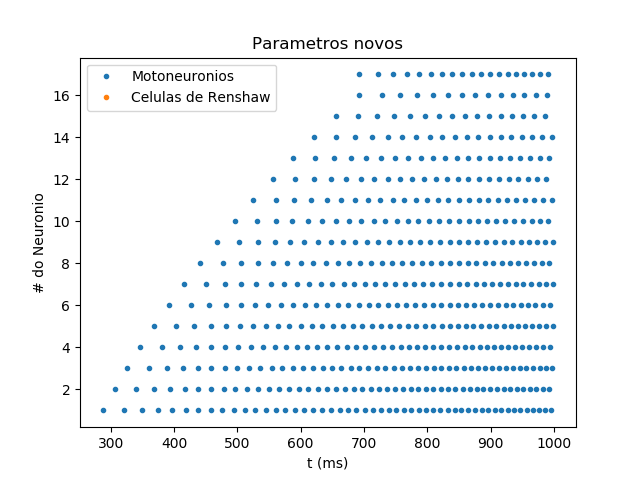

In [9]:
plt.figure()
plt.plot(spikeTimesMN_new, spikingMN_new, '.', label = "Motoneuronios")
plt.plot(spikeTimesRC_new, SpikingRC_new, '.', label = "Celulas de Renshaw")
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
plt.title('Parametros novos')
plt.show()

<IPython.core.display.Javascript object>


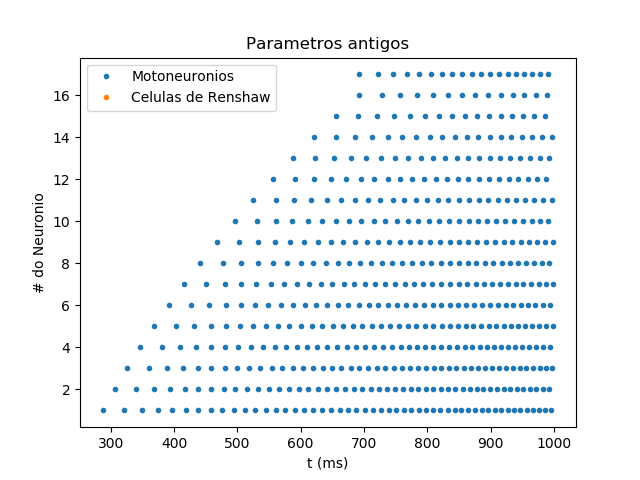

In [10]:
plt.figure()
plt.plot(spikeTimesMN_old, spikingMN_old, '.', label = "Motoneuronios")
plt.plot(spikeTimesRC_old, SpikingRC_old, '.', label = "Celulas de Renshaw")
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
plt.title('Parametros antigos')
plt.show()

These simulations, together with the ones from Uchiyama et al. 2003, should bring interesting discussions. Last simulation took 2hrs